In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('financials.csv')
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [3]:
df.tail()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
695,Small Business,France,Amarilla,High,"$2,475.00",$260.00,$300.00,"$7,42,500.00","$1,11,375.00","$6,31,125.00","$6,18,750.00","$12,375.00",01/03/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,$546.00,$260.00,$300.00,"$1,63,800.00","$24,570.00","$1,39,230.00","$1,36,500.00","$2,730.00",01/10/2014,10,October,2014
697,Government,Mexico,Montana,High,"$1,368.00",$5.00,$7.00,"$9,576.00","$1,436.40","$8,139.60","$6,840.00","$1,299.60",01/02/2014,2,February,2014
698,Government,Canada,Paseo,High,$723.00,$10.00,$7.00,"$5,061.00",$759.15,"$4,301.85","$3,615.00",$686.85,01/04/2014,4,April,2014
699,Channel Partners,United States of America,VTT,High,"$1,806.00",$250.00,$12.00,"$21,672.00","$3,250.80","$18,421.20","$5,418.00","$13,003.20",01/05/2014,5,May,2014


In [4]:
df.isnull().sum()

Segment                  0
Country                  0
 Product                 0
 Discount Band           0
 Units Sold              0
 Manufacturing Price     0
 Sale Price              0
 Gross Sales             0
 Discounts               0
  Sales                  0
 COGS                    0
 Profit                  0
Date                     0
Month Number             0
 Month Name              0
Year                     0
dtype: int64

There is no null value present in our dataset but we can see that there is a error in column names

In [5]:
# for making error free column wecan use strip function to remove leading whitespaces
df.columns = df.columns.str.strip()

In [6]:
df.isnull().sum()

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
Sales                  0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64

Now we can see there is no leading whitespace

In [7]:
df.dtypes

Segment                object
Country                object
Product                object
Discount Band          object
Units Sold             object
Manufacturing Price    object
Sale Price             object
Gross Sales            object
Discounts              object
Sales                  object
COGS                   object
Profit                 object
Date                   object
Month Number            int64
Month Name             object
Year                    int64
dtype: object

columns like sold units has integer values as we can see but due to dollor sign it is considered as object data type so we have to remove dollor sign and convert into int data type

In [8]:
dollor=['Units Sold','Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']
for columns in dollor:
    if df[columns].dtype == 'object':
        df[columns]=df[columns].str.replace('$', '')

In [9]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"1,618.50",3.00,20.00,"32,370.00",-,"32,370.00","16,185.00","16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"1,321.00",3.00,20.00,"26,420.00",-,"26,420.00","13,210.00","13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"2,178.00",3.00,15.00,"32,670.00",-,"32,670.00","21,780.00","10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.00,3.00,15.00,"13,320.00",-,"13,320.00","8,880.00","4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"2,470.00",3.00,15.00,"37,050.00",-,"37,050.00","24,700.00","12,350.00",01/06/2014,6,June,2014


In [10]:
df['Discounts']=df['Discounts'].replace('-','0', regex=True)

In [11]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"1,618.50",3.00,20.00,"32,370.00",0,"32,370.00","16,185.00","16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"1,321.00",3.00,20.00,"26,420.00",0,"26,420.00","13,210.00","13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"2,178.00",3.00,15.00,"32,670.00",0,"32,670.00","21,780.00","10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.00,3.00,15.00,"13,320.00",0,"13,320.00","8,880.00","4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"2,470.00",3.00,15.00,"37,050.00",0,"37,050.00","24,700.00","12,350.00",01/06/2014,6,June,2014


In [12]:
# for coverting the object data type to float we can astype function
for columns in dollor:
    df[columns]=df[columns].replace(',','',regex = True)

In [13]:
df['Units Sold']= df['Units Sold'].astype(float)
df['Manufacturing Price']= df['Manufacturing Price'].astype(float)
df['Sale Price']= df['Sale Price'].astype(float)
df['Gross Sales']= df['Gross Sales'].astype(float)
df['Discounts']= df['Discounts'].astype(float)
df['Sales']= df['Sales'].astype(float)
df['COGS']= df['COGS'].astype(float)

In [14]:
(df['Profit']==' -   ').sum()

5

In [15]:
df = df[df['Profit'] != ' -   ']

In [16]:
df['Profit']=df['Profit'].str.strip()

In [17]:
df['Profit']=df['Profit'].replace(r'[()]','', regex = True)

In [18]:
df['Profit']= df['Profit'].astype(float)

In [19]:
df.dtypes

Segment                 object
Country                 object
Product                 object
Discount Band           object
Units Sold             float64
Manufacturing Price    float64
Sale Price             float64
Gross Sales            float64
Discounts              float64
Sales                  float64
COGS                   float64
Profit                 float64
Date                    object
Month Number             int64
Month Name              object
Year                     int64
dtype: object

We can see that now all the columns which seems like integer now they are in float datatype

But columns like Date and Year has not datatype as Date so we need to convert

In [20]:
df['Date']=pd.to_datetime(df['Date'])

In [21]:
df.dtypes

Segment                        object
Country                        object
Product                        object
Discount Band                  object
Units Sold                    float64
Manufacturing Price           float64
Sale Price                    float64
Gross Sales                   float64
Discounts                     float64
Sales                         float64
COGS                          float64
Profit                        float64
Date                   datetime64[ns]
Month Number                    int64
Month Name                     object
Year                            int64
dtype: object

We dont need year, month number and month name column because we can get these values from Date column so we can drop it

In [22]:
df=df.drop(['Month Number', 'Month Name', 'Year'], axis=1)

In [23]:
df.dtypes

Segment                        object
Country                        object
Product                        object
Discount Band                  object
Units Sold                    float64
Manufacturing Price           float64
Sale Price                    float64
Gross Sales                   float64
Discounts                     float64
Sales                         float64
COGS                          float64
Profit                        float64
Date                   datetime64[ns]
dtype: object


We done with all the cleaning methods and now data is cleaned and organised in proper format. Now we can go for the Data analysis and visualization

In [24]:
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,2014-01-06
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.0,13320.0,8880.0,4440.0,2014-01-06
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,2014-01-06


In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Country wise analysis

In [26]:
group = df.groupby('Country').agg({'Sales':'sum','Profit':'sum','Units Sold':'sum','COGS':'sum'}).reset_index()

In [27]:
group.head(10)

,Country,Sales,Profit,Units Sold,COGS
0,Canada,24887654.89,3858206.39,247428.5,21358426.0
1,France,23995612.29,4032488.29,237943.0,20214591.5
2,Germany,23409940.82,3961381.32,200699.0,19729552.0
3,Mexico,20547352.11,3198923.11,199975.0,17639829.0
4,United States of America,25029830.18,3397345.68,232627.5,22034289.5


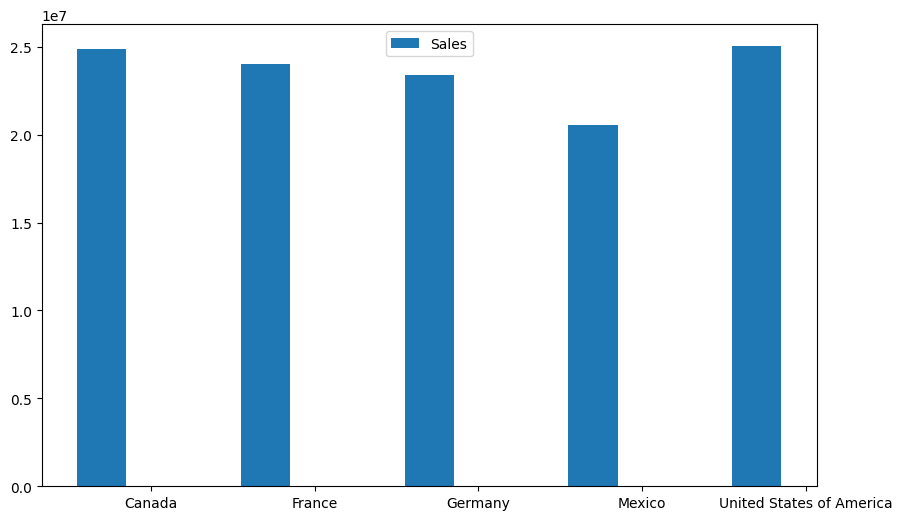

In [28]:
bar_width = 0.3
plt.figure(figsize=(10,6))
# calculate the x positions for bars
x = np.arange(len(group['Country']))
plt.bar(x-bar_width,group['Sales'],bar_width,label='Sales')

plt.xticks(x,group['Country'])
plt.legend()
plt.show()


We can see that highest sale is noticed in USA and in Canada and lowest sale is recorded in Mexico

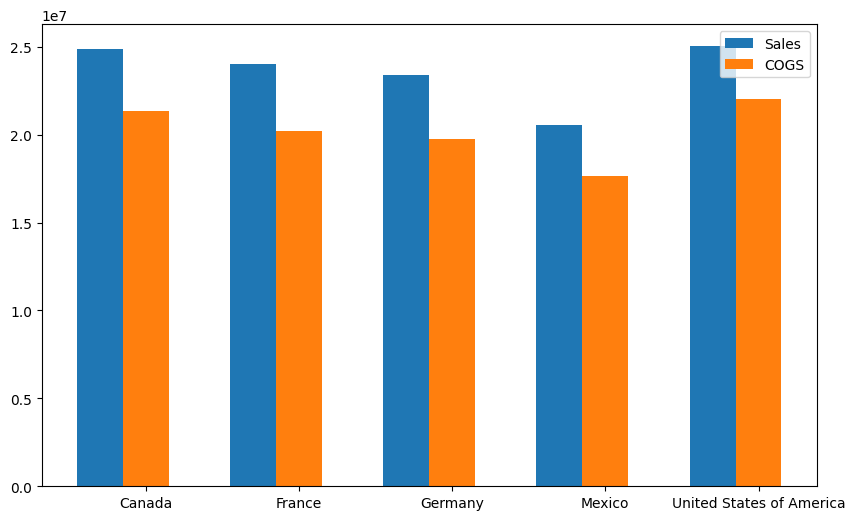

In [29]:
plt.figure(figsize=(10,6))
x= np.arange(len(group['Country']))
plt.bar(x-bar_width,group['Sales'],bar_width,label='Sales')
plt.bar(x,group['COGS'],bar_width,label='COGS')
plt.xticks(x,group['Country'])
plt.legend()
plt.show()


We can see that Sales is more than the COGS(Cost of Gross Sale) it means company is in profit

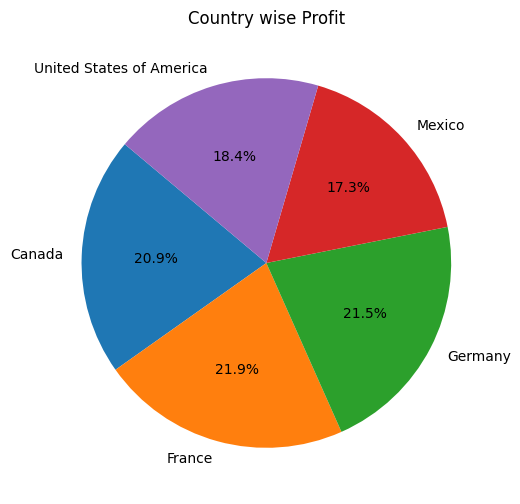

In [30]:
plt.figure(figsize=(10,6))
plt.pie(group['Profit'],labels=group['Country'],autopct='%1.1f%%',startangle=140)
plt.title('Country wise Profit')
plt.show()

# Product wise analysis

In [31]:
group_product=df.groupby('Product').agg({'Units Sold':'sum', 'Manufacturing Price':'mean', 'Sale Price':'mean', 'Gross Sales':'sum', 'Profit':'sum', 'COGS':'sum'}).reset_index()

In [32]:
group_product['Gross Margin']=group_product['Sale Price']-group_product['Manufacturing Price']


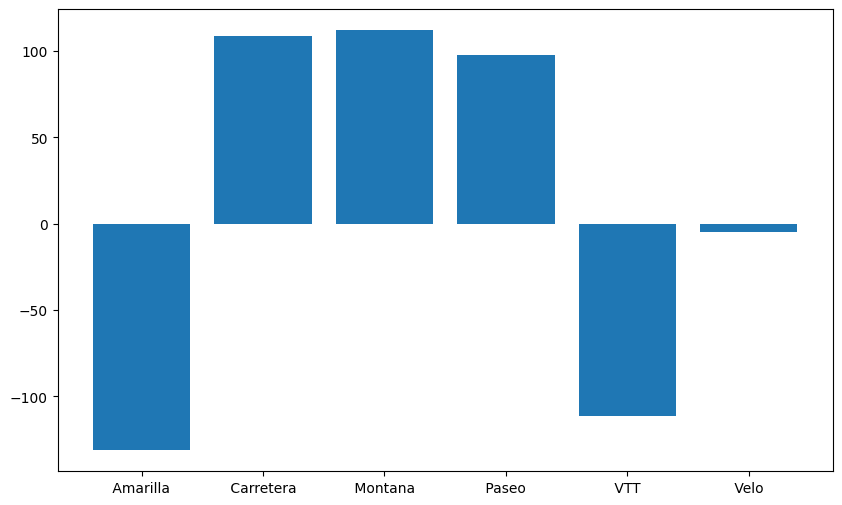

In [33]:
plt.figure(figsize=(10,6))
categories=group_product['Product']
margin_values=group_product['Gross Margin']
plt.bar(categories,margin_values,label='Gross Margin')
plt.xticks(group_product['Product'])
plt.show()

From above figure we can see that Product 'Amarilla' and product 'VTT' has negative gross margin and product 'Velo' has very low margin

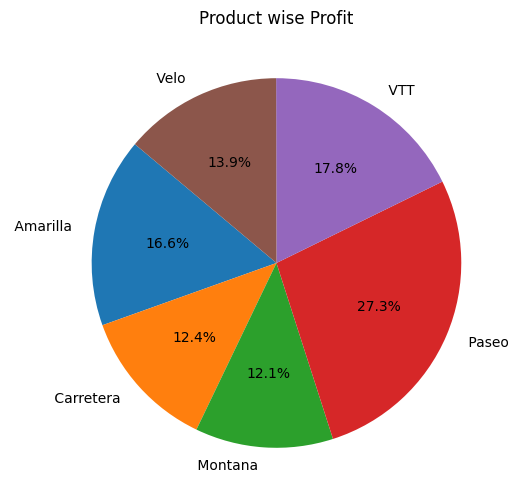

In [34]:
plt.figure(figsize=(10,6))

plt.pie(group_product['Profit'], labels=group_product['Product'], autopct='%1.1f%%', startangle=140)
plt.title('Product wise Profit')
plt.show()

From here we can see that Paseo has highest profit and Montana have low profit


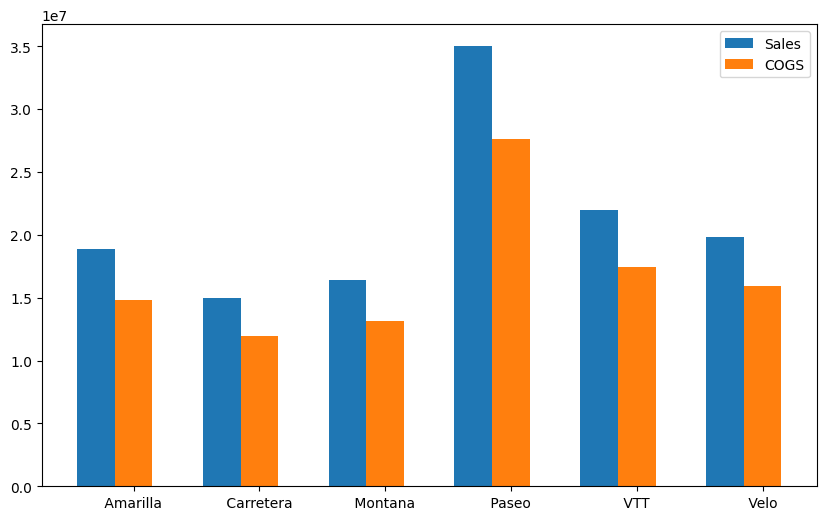

In [35]:
plt.figure(figsize=(10,6))
x = np.arange(len(group_product['Product']))
plt.bar(x-bar_width,group_product['Gross Sales'],bar_width,label='Sales')
plt.bar(x,group_product['COGS'],bar_width,label="COGS")
plt.xticks(x,group_product['Product'])
plt.legend()
plt.show()

Sales of Paseo is much more than other Products and Carretera has the low sales


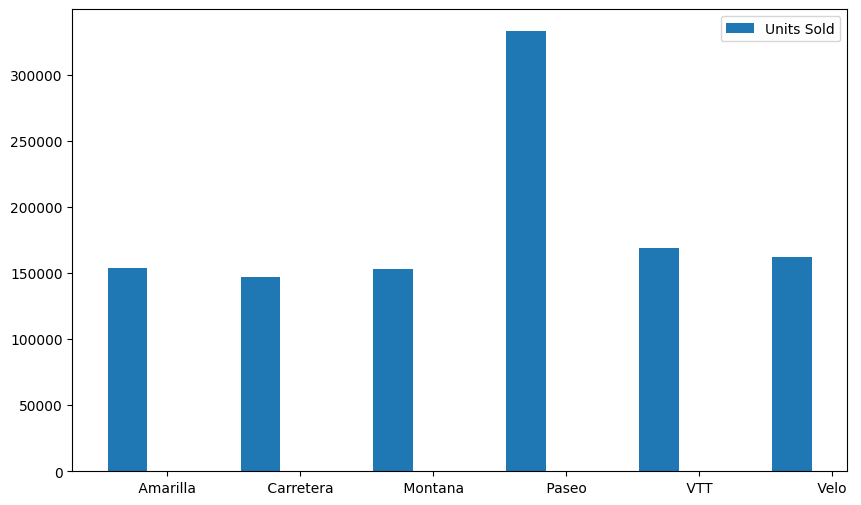

In [36]:
bar_width = 0.3
plt.figure(figsize=(10,6))
x = np.arange(len(group_product['Product']))
plt.bar(x-bar_width,group_product['Units Sold'],bar_width,label='Units Sold')
plt.xticks(x,group_product['Product'])
plt.legend()
plt.show()

From here we can clearly see that Paseo is the product which sells maximum


# Sector wise analysis

In [37]:
group_segment=df.groupby('Segment').agg({'Units Sold':'sum', 'Gross Sales':'sum', 'Profit':'sum', 'COGS':'sum'}).reset_index()

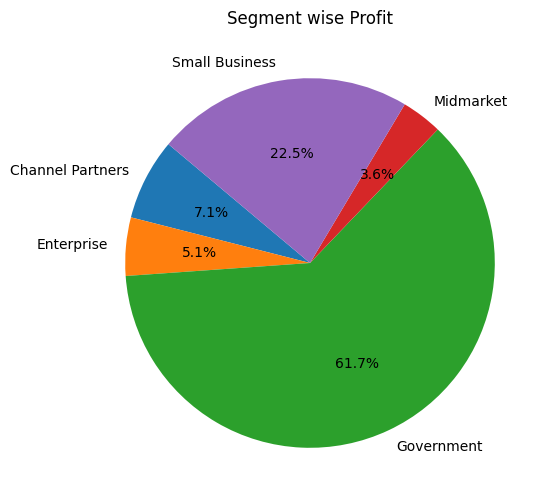

In [38]:
plt.figure(figsize=(10,6))

plt.pie(group_segment['Profit'], labels=group_segment['Segment'], autopct='%1.1f%%', startangle=140)
plt.title('Segment wise Profit')
plt.show()


Goverment segment gives most profit and Midmarket gives least profit


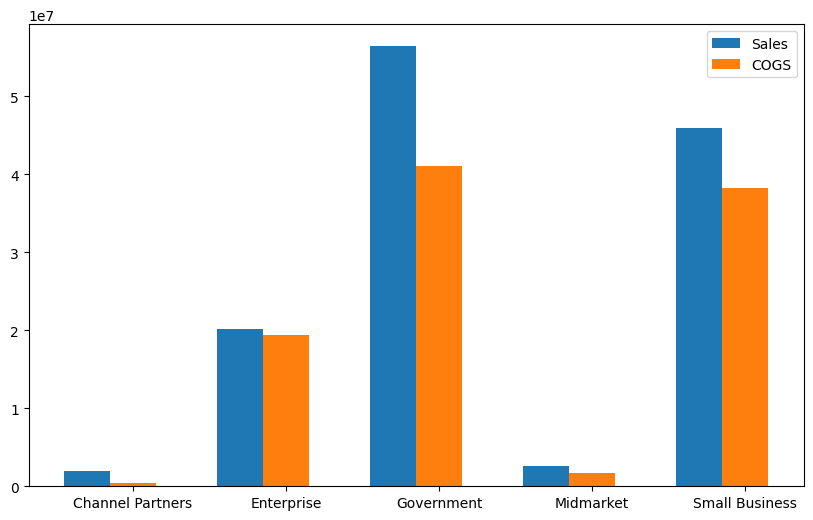

In [39]:
plt.figure(figsize=(10,6))
x = np.arange(len(group_segment['Segment']))
plt.bar(x-bar_width, group_segment['Gross Sales'], bar_width, label='Sales')
plt.bar(x, group_segment['COGS'], bar_width, label='COGS')
# plt.bar(x+bar_width, group['Units Sold'], bar_width, label='Units Sold')

# plt.xlabel('Country')
# plt.ylabel('Values')
plt.xticks(x, group_segment['Segment'])
plt.legend()
plt.show()

In the Enterprise sector cost of sales and sales is almost same so we can say that margin in that sector could be low and in goverment sector difference between Sales and COGS is more means this sector has more margin

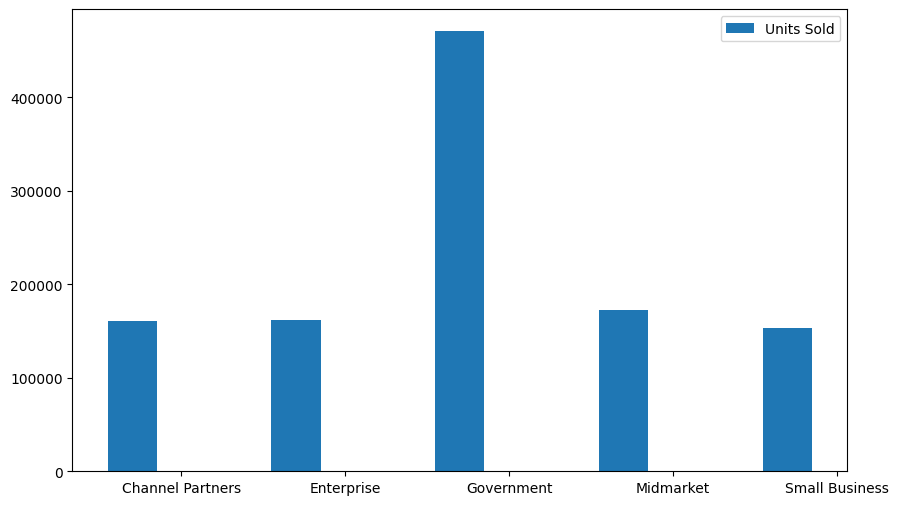

In [40]:
bar_width = 0.3
plt.figure(figsize=(10,6))
# Calculate the x positions for the bars
x = np.arange(len(group_segment['Segment']))
plt.bar(x-bar_width, group_segment['Units Sold'], bar_width, label='Units Sold')

plt.xticks(x,group_segment['Segment'])
plt.legend()
plt.show()

more units are sold in goverment sector then mid market and least units are sold in small business

# Analysis by time and date

In [41]:

df.dtypes

Segment                        object
Country                        object
Product                        object
Discount Band                  object
Units Sold                    float64
Manufacturing Price           float64
Sale Price                    float64
Gross Sales                   float64
Discounts                     float64
Sales                         float64
COGS                          float64
Profit                        float64
Date                   datetime64[ns]
dtype: object

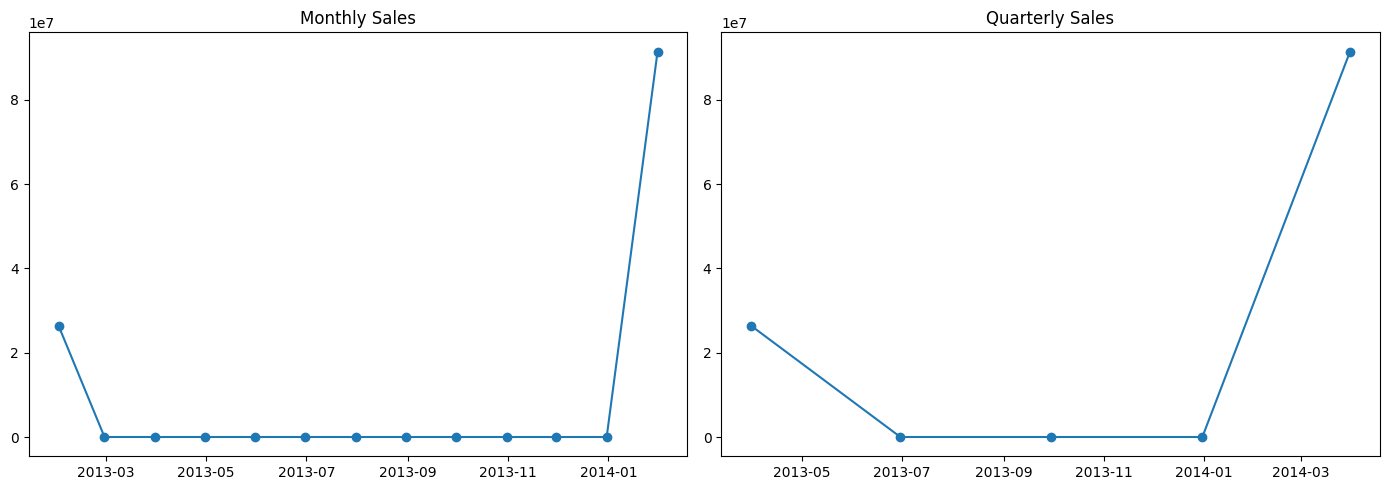

In [42]:
df.set_index('Date', inplace=True)

monthly_sales = df['Sales'].resample('M').sum()
quarterly_sales = df['Sales'].resample('Q').sum()

# Create line graphs for monthly and quarterly sales
plt.figure(figsize=(14, 5))

# Monthly line graph
plt.subplot(1, 2, 1)
plt.plot(monthly_sales, marker='o')
plt.title('Monthly Sales')

# Quarterly line graph
plt.subplot(1, 2, 2)
plt.plot(quarterly_sales, marker='o')
plt.title('Quarterly Sales')

# Show the plots
plt.tight_layout()
plt.show()

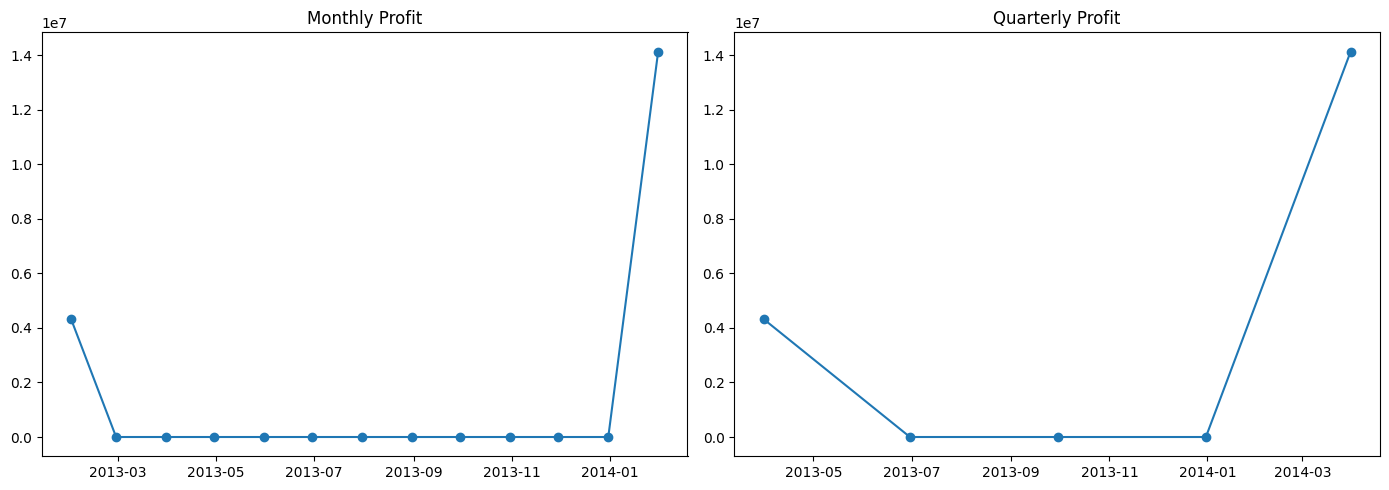

In [43]:
# df.set_index('Date', inplace=True)

monthly_profit = df['Profit'].resample('M').sum()
quarterly_profit = df['Profit'].resample('Q').sum()

# Create line graphs for monthly and quarterly sales
plt.figure(figsize=(14, 5))

# Monthly line graph
plt.subplot(1, 2, 1)
plt.plot(monthly_profit, marker='o')
plt.title('Monthly Profit')

# Quarterly line graph
plt.subplot(1, 2, 2)
plt.plot(quarterly_profit, marker='o')
plt.title('Quarterly Profit')

# Show the plots
plt.tight_layout()
plt.show()

In [44]:
Yearly_profit = df['Profit'].resample('Y').sum()

In [45]:
Yearly_profit=Yearly_profit.reset_index()
Yearly_profit

,Date,Profit
0,2013-12-31,4323139.51
1,2014-12-31,14125205.28


<BarContainer object of 2 artists>

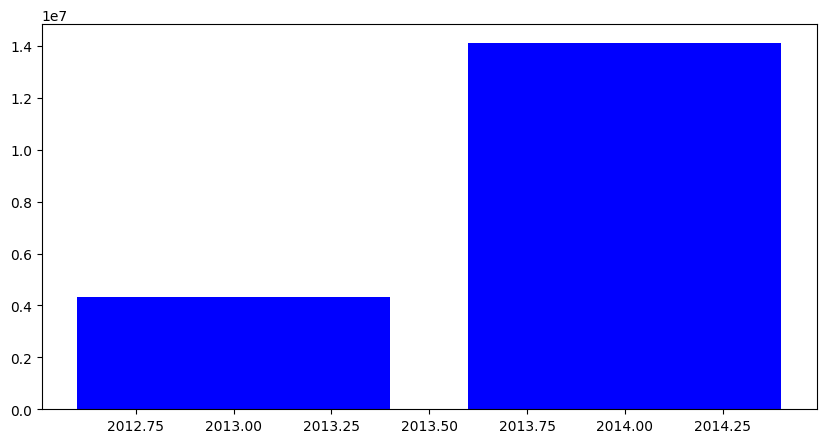

In [46]:
Yearly_profit['Date'] = pd.to_datetime(Yearly_profit['Date'])

plt.figure(figsize=(10, 5))
plt.bar(Yearly_profit['Date'].dt.year, Yearly_profit['Profit'], color='blue')